<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_ai_20250630/blob/main/ximen_titanic_0707.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen_ai_20250630/raw/refs/heads/main/titanic/train.csv"
urlretrieve(url, "train.csv")

url = "https://github.com/Elwing-Chou/ximen_ai_20250630/raw/refs/heads/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7d14223efbd0>)

In [2]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")



```
資料預處理(x)

把資料分成兩種
1. 數值類型(連續大小):
Age, SibSp, Parch, Ticket(#), Fare
2. 固定類型:
Pclass, Name, Sex, Cabin, Embarked

1. 補上所有空值
2. 固定類型做One-hot
Extra. 想辦法做出更多欄位

```



In [3]:
# 注意axis=0/1
train_test = pd.concat([train, test], axis=0)

In [4]:
train_test = train_test.drop(["PassengerId", "Survived"], axis=1)
train_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S




```
pandas兩大操作
1. 過濾
2. 轉換

```



In [5]:
# Demo pandas
# 1. 過濾: 帶入跟你資料筆數依樣多的True/Fasle
# 隊到True的會留下, 隊到False會被刪去
fil = [True, False, True]
train_test.head(3)[fil]
fil = train_test["Age"] > 50
train_test[fil]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...
356,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S
374,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S
378,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S
387,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S


In [6]:
# Demo Pandas
# 2. 轉換操作: apply

In [7]:
# Evertyhing is an object
# 每個東西都有形態, 每個型態都有對應操作
# 型態: print
# 操作: (3)
import random
def test(t):
    if t == 0:
        return random.randint
    else:
        return random.uniform
test(0)(2, 5)

5

In [8]:
# Demo Apply
# DataFrame: 2d表格  Series: 1d(一行一列)
def flow(n):
    return n + 100

s = pd.Series([1, 2, 3, 4])
s.apply(flow)

,0
0,101
1,102
2,103
3,104


In [9]:
def flow(s):
    # s = "Braund, Mr. Owen Harris"
    s_spl = s.split(",")[-1].split(".")[0]
    return s_spl.strip()
# value_counts()
name_apply = train_test["Name"].apply(flow)
# name_apply.value_counts()
train_test["Name"] = name_apply

In [10]:
def flow(s):
    if pd.isna(s):
        return s
    else:
        return s[0]
cabin_apply = train_test["Cabin"].apply(flow)
train_test["Cabin"] = cabin_apply

In [11]:
counts = train_test["Ticket"].value_counts()
def flow(s):
    if pd.isna(s):
        return s
    else:
        return counts[s]
train_test["Ticket"] = train_test["Ticket"].apply(flow)

In [12]:
# 預處理第一步: 補空值
# 1. 類別: 最常出現
# 2. 數值: 中位數
# 中位數/平均
train_test.isna().sum().sort_values(ascending=False)

,0
Cabin,1014
Age,263
Embarked,2
Fare,1
Name,0
Pclass,0
Parch,0
SibSp,0
Sex,0
Ticket,0


In [13]:
most = train_test["Embarked"].value_counts().idxmax()
train_test["Embarked"] = train_test["Embarked"].fillna(most)

In [14]:
# DataFrame/Series:
# 準備跟你的資料筆數依樣多True/False
# 對到True會留下, 隊到False刪除
d = train_test.dtypes
category_cols = list(d[d == "object"].index) + ["Pclass"]
number_cols = d[d != "object"].index.drop("Pclass")
med = train_test[number_cols].median()
train_test = train_test.fillna(med)

In [15]:
# step2. 對類別型態的資料作One-hot
# 類別型態做One-hot肯定沒問題
# 可以不做: 有大小關係的類別和二值型類別
# Pclass可否不做? 有大小關係的類別(可以不做)
# ????? 到底做不做
# Name必做 我為了表格的美觀, 我會預先把一些太稀少的丟掉
# Captain(稀少) 0  0  0
# Sex 可以不做(二值)
# Cabin 直接One-hot Nan-> 0 0 0 0
# 類別型態你是可以不用補缺失值, 你可以直接One-hot 000
reserved = train_test["Name"].value_counts().index[:4]
def flow(s):
    if s in reserved:
        return s
    else:
        return None
train_test["Name"] = train_test["Name"].apply(flow)

In [16]:
pd.set_option('display.max_columns', 500)
train_test = pd.get_dummies(train_test, columns=category_cols)

In [17]:
train_test

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,38.0,1,0,2,71.2833,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,26.0,0,0,1,7.9250,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,35.0,1,0,2,53.1000,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
4,35.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
414,39.0,0,0,3,108.9000,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
415,38.5,0,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
416,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True




```
預處理SOP
1. 數值補中位數
2. 類別做One-Hot
extra. 想辦法組合一些有道理的欄位

```



In [18]:
train_test["Family"] = train_test["SibSp"] + train_test["Parch"]

In [19]:
# Demo pandas: loc(看列標籤)/iloc(看真的是第幾列)
d = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
], index=[1, 1, 2])
d.iloc[1]

,1
0,3
1,4


In [20]:
x = train_test.iloc[:len(train)]
y = train["Survived"]
x_predict = train_test.iloc[len(train):]

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE()
x_tsne = tsne.fit_transform(x)
x_tsne_df = pd.DataFrame(x_tsne)
x_tsne_df

,0,1
0,-21.778639,-17.945801
1,40.779438,0.275743
2,-28.759666,-7.203015
3,32.760254,-1.129489
4,-15.040663,17.720327
...,...,...
886,-11.251827,3.086350
887,9.563035,-8.913439
888,6.265306,-0.650694
889,12.316655,-4.658920




```
繪圖函式庫:
1. matplotlib: 所有東西的基礎
2. seaborn: 把matplotlib打包讓你比較好用

```



<Axes: xlabel='0', ylabel='1'>

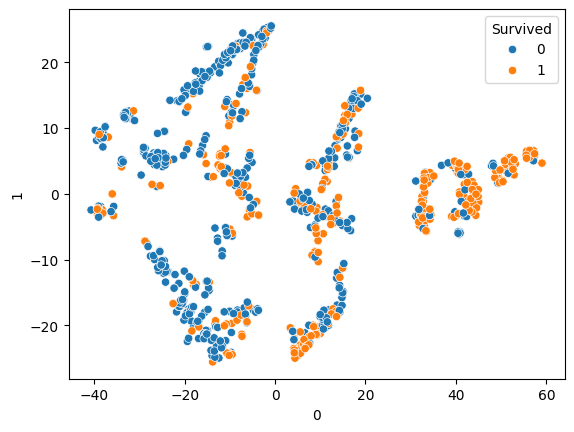

In [22]:
# 最常用: countplot, scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x_tsne_df[0],
                y=x_tsne_df[1],
                hue=y)

In [23]:
# 鐵達尼號用accuracy是沒有問題的
# 但我想多教你一點metrics的知識
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
pre = clf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        51
           1       0.79      0.77      0.78        39

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [45]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(clf,
                         x,
                         y,
                         cv=10,
                         scoring="f1_macro",
                         n_jobs=-1)
avg = np.average(scores)
print(scores)
print(avg)

[0.82168802 0.86983114 0.73812526 0.85022654 0.83518519 0.77516288
 0.84030366 0.74858757 0.84442652 0.84616407]
0.8169700840258219
